## Introduction
In the analysis that follows, the monthly housing cost is plotted across different income groups, structure types, home values, utility costs, owner/renter assisted, and assisted/not assisted households. The following patterns were noticed:

## Monthly Housing Cost Across Time and Income Levels
The median monthly housing cost increases year to year and with increasing income level. Comparing 1985 and 2013 data, the monthly housing cost has more data spread in 2013 observations. In the 1985-2013 period, the median monthly housing cost increased by a factor ranging from 2.2 to 2.9 depending on the income group.

## Structure Types
On average, mobile homes have the least monthly cost. Single family homes have the biggest monthly cost on average. The spread in cost increases in 2013 compared to 1985 data.

## Home Values
The spread of home values increases from 1985 to 2013. Also the median home value increases for all income groups roughly by a factor of 3. A 4 percent annual inflation rate over a 28-year period would increase prices by a factor of 3. There is also an overlap in home values among the highest and lowest income group. This suggests a lack of affordable housing?

## Utility Costs
Median utility cost values have increased roughly by a factor of 4 over a 28-year period. Also the spread of utility costs has increased over that same time period across all income groups.

## Monthly Housing Cost Change
Looking over all income groups, the change in monthly housing cost has increased across all income groups.

The lowest income group saw the biggest increase from 1985 to 2013. The highest income group saw the smallest increase in monthly housing cost.

## Owners vs. Renters
Owners on average have lower monthly housing cost. The monthly housing cost has on average increased from 1985 to 2013 for both owners and renters.

## Assisted vs. Not Assisted
Not assisted households on average have a higher monthly housing cost. The monthly housing cost increased on average for both assisted and not assisted households.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
_ = sns.set_style("darkgrid")
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
df85 = pd.read_csv("85_clean.csv", index_col = 'CONTROL')
df87 = pd.read_csv("87_clean.csv", index_col = 'CONTROL')
df89 = pd.read_csv("89_clean.csv", index_col = 'CONTROL')
df91 = pd.read_csv("91_clean.csv", index_col = 'CONTROL')
df93 = pd.read_csv("93_clean.csv", index_col = 'CONTROL')
df95 = pd.read_csv("95_clean.csv", index_col = 'CONTROL')
df97 = pd.read_csv("97_clean.csv", index_col = 'CONTROL')
df99 = pd.read_csv("99_clean.csv", index_col = 'CONTROL')
df01 = pd.read_csv("01_clean.csv", index_col = 'CONTROL')
df03 = pd.read_csv("03_clean.csv", index_col = 'CONTROL')
df05 = pd.read_csv("05_clean.csv", index_col = 'CONTROL')
df07 = pd.read_csv("07_clean.csv", index_col = 'CONTROL')
df09 = pd.read_csv("09_clean.csv", index_col = 'CONTROL')
df11 = pd.read_csv("11_clean.csv", index_col = 'CONTROL')
df13 = pd.read_csv("13_clean.csv", index_col = 'CONTROL')

In [2]:
# define a dictionary of dataframes, the key is the year of dataframe
df_dict = {'1985':df85, '1987':df87, '1989':df89, '1991':df91, '1993':df93, '1995': df95, '1997':df97, '1999':df99,\
          '2001':df01, '2003':df03, '2005':df05, '2007':df07, '2009':df09, '2011':df11, '2013':df13\
          }

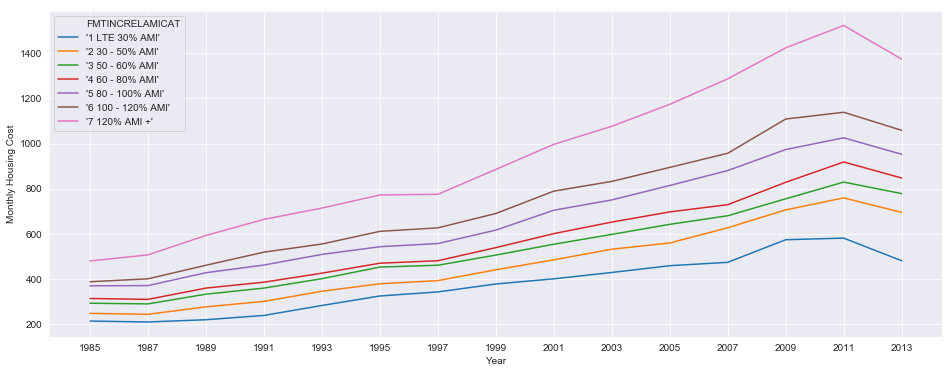

In [4]:
# store median burden for each year in dataframe df_statB, then plot this
df_statB = pd.DataFrame()
for key in df_dict.keys():
    df = df_dict[key]
    df = df.groupby('FMTINCRELAMICAT').median()
    df = df[['ZSMHC']]
    df['YEAR'] = key
    df = df.reset_index()
    df_statB = df_statB.append(df)

_ = plt.figure(figsize=(16,6))
_ = sns.lineplot(x = 'YEAR', y = 'ZSMHC', hue = 'FMTINCRELAMICAT', data = df_statB)
_ = _.set(xlabel = 'Year', ylabel = 'Monthly Housing Cost')



The median housing cost increases year over year and with income level

In [12]:
# create a dataframe df that stores all data from 1985 and 2013
df_temp = {}
df = pd.DataFrame()

for year in ['1985','2013']:
    df_temp[year] = df_dict[year]
    # remove any values of '.' in FMTSTRUCTURE TYPE
    df_temp[year] = df_temp[year].loc[~df_temp[year]['FMTSTRUCTURETYPE'].str.contains('.', regex=False),:]
    # remove any NaN values in ZSMHC
    df_temp[year] = df_temp[year].loc[~df_temp[year]['ZSMHC'].isna(), :]
    # remove index
    df_temp[year] = df_temp[year].reset_index()
    # add a YEAR column
    df_temp[year]['YEAR'] = year
    # append data frame to df
    df = df.append(df_temp[year])

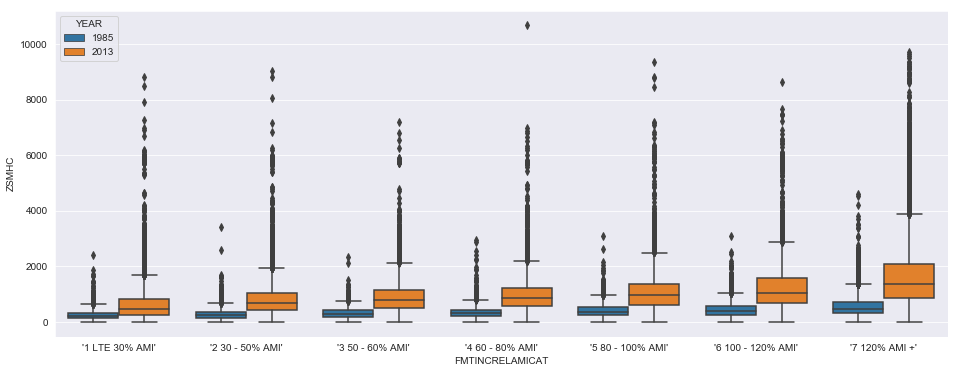

In [13]:
#make box plot for years 1985 and 2013 accross all income groups
income_group_order = ['\'1 LTE 30% AMI\'', '\'2 30 - 50% AMI\'', '\'3 50 - 60% AMI\'', '\'4 60 - 80% AMI\'',\
                      '\'5 80 - 100% AMI\'', '\'6 100 - 120% AMI\'', '\'7 120% AMI +\'']
_ = plt.figure(figsize=(16,6))
_ = sns.boxplot(x = 'FMTINCRELAMICAT', y = 'ZSMHC', hue = 'YEAR', order = income_group_order, data = df)

We see that there are more outliers in 2013 data compared to 1985 data. The monthly housing cost (ZSMHC) increases from 1985 to 2013 across all income groups.

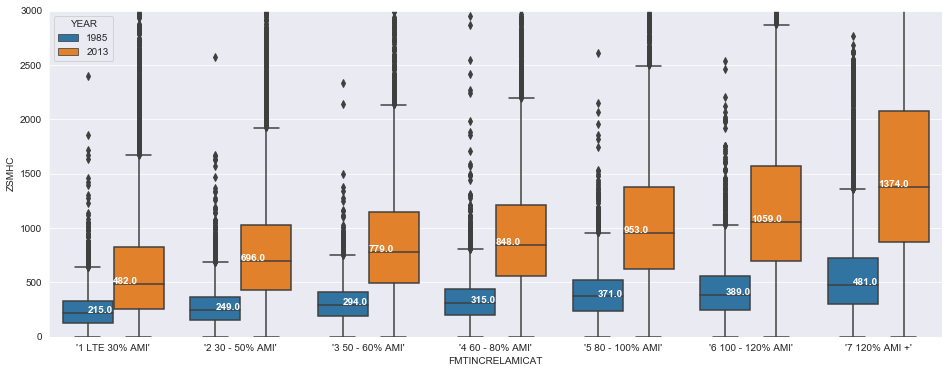

In [14]:
#zoom in to see the box plot better
_ = plt.figure(figsize=(16,6))
_ = plt.ylim(0, 3000)
ax = sns.boxplot(x = 'FMTINCRELAMICAT', y = 'ZSMHC', hue = 'YEAR', order = income_group_order, data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['ZSMHC'].median().values

median_labels = [str(np.round(s, 2)) for s in medians]

xpos = np.arange(7)
ypos = medians


for x, y, label in zip(xpos, ypos[0:7], median_labels[0:7]):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', ha='right',transform=ax.transData)

for x, y, label in zip(xpos, ypos[7:], median_labels[7:]):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', ha='left',transform=ax.transData)

In [11]:
print(medians[7:]/medians[0:7])

[2.24186047 2.79518072 2.64965986 2.69206349 2.56873315 2.72236504
 2.85654886]


In the plot above, we can better see the quartiles accross all income groups. Note that the monthly housing cost has increased from 1985 to 2013 for all income groups. The numbers annotated in white text are the median monthly housing cost values. The median burden has increased in the period 1985-2013 by a factor ranging from 2.2 to 2.9 across income groups.

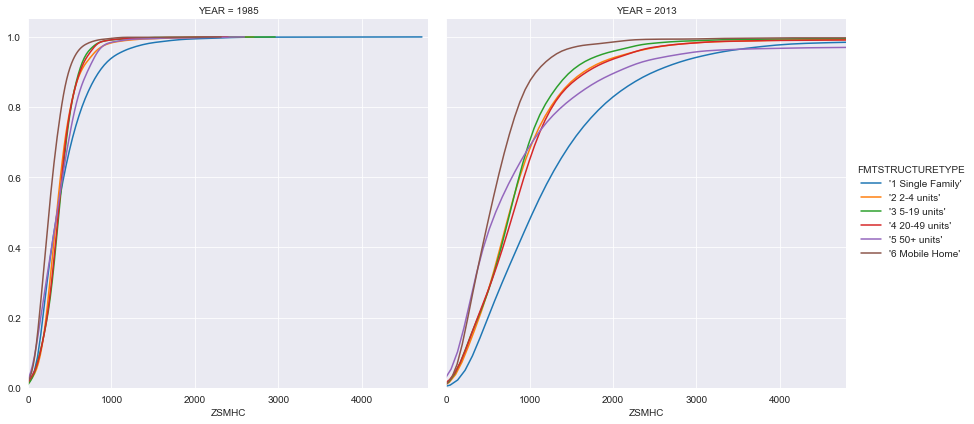

In [18]:
# plot data frame df for ZSMHC across different structure types
structure_type_order = ['\'1 Single Family\'', '\'2 2-4 units\'', '\'3 5-19 units\'', '\'4 20-49 units\'',\
                        '\'5 50+ units\'', '\'6 Mobile Home\'']
g = sns.FacetGrid(df, col='YEAR', hue='FMTSTRUCTURETYPE', hue_order=structure_type_order,\
                  height=6, aspect=1)
_ = plt.xlim(0, 4800)
_ = g.map(sns.kdeplot, 'ZSMHC', cumulative=True)
_ = g.add_legend()


Above is the cumulative probability plot for monthly housing cost for the years 1985 and 2013. We see that there is more of a spread in monthly housing costs for 2013 compared to 1985. On average, mobile homes have the least cost and single family homes pay the most monthly.

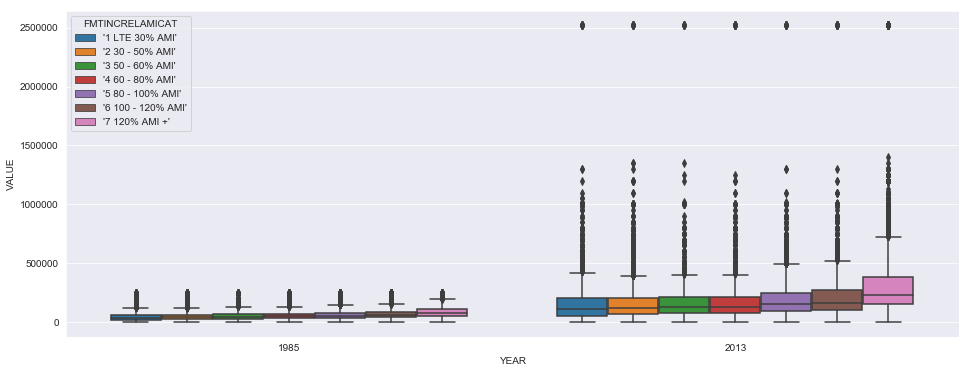

In [19]:
# Plot home values across all income groups for years 1985 and 2013
_ = plt.figure(figsize=(16,6))
_ = sns.boxplot(x = 'YEAR', y = 'VALUE', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], hue_order = income_group_order,\
                data = df)

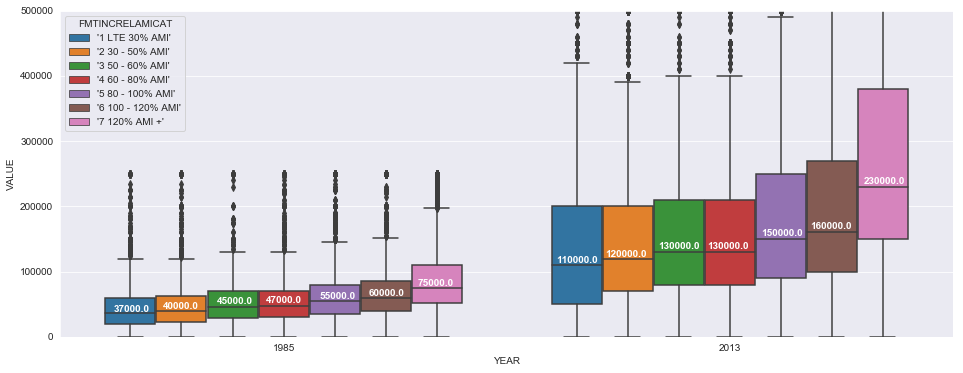

In [20]:
# zoom in to see quartiles better; also add median income annotation
fig   = plt.figure(figsize=(16,6))
ylims = plt.ylim(0, 500000)
ax    = sns.boxplot(x = 'YEAR', y = 'VALUE', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], hue_order = income_group_order,\
                data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['VALUE'].median().values

median_labels = [str(np.round(s, 0)) for s in medians]

xpos = np.array([0.06, 0.115, 0.175, 0.23, 0.29, 0.345, 0.4,    0.555, 0.61, 0.67, 0.725, 0.785, 0.84, 0.9])
ypos = np.array([0.075, 0.085, 0.1, 0.105, 0.115, 0.125, 0.155, 0.225, 0.245,  0.27,  0.27,  0.31,  0.33,  0.47])


for x, y, label in zip(xpos, ypos, median_labels):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', transform=ax.transAxes)

The spread of home values increases from 1985 to 2013. Also the median value increases for all income groups roughly by a factor of 3. The median value is annotated for each income group in plot above. A 4 percent annual inflation rate over a 28-year period would increase home values by a factor of 3.

There is also an overlap in home values among the highest and lowest income group. This suggests a lack of affordable housing?

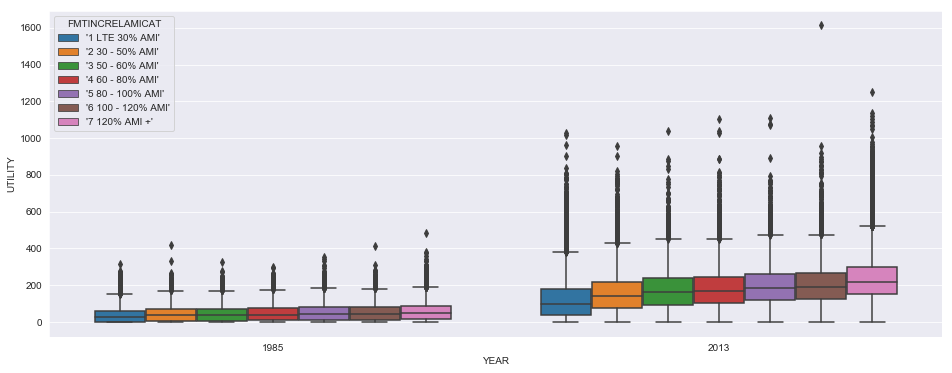

In [21]:
# Plot utility costs across all income groups for years 1985 and 2013
_ = plt.figure(figsize=(16,6))
_ = sns.boxplot(x = 'YEAR', y = 'UTILITY', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], hue_order = income_group_order,\
                data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['UTILITY'].median().values

median_labels = [str(np.round(s, 0)) for s in medians]

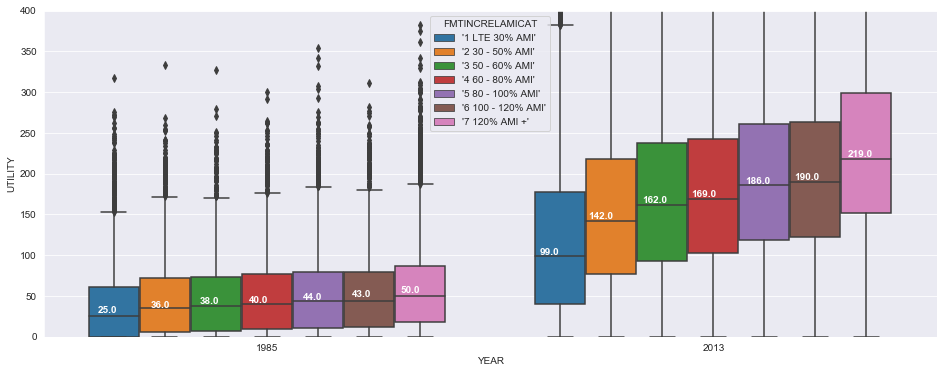

In [22]:
# zoom in to see quartiles better; also add median utility costs annotation
fig   = plt.figure(figsize=(16,6))
ylims = plt.ylim(0, 400)
ax    = sns.boxplot(x = 'YEAR', y = 'UTILITY', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], \
                    hue_order = income_group_order, data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['UTILITY'].median().values

median_labels = [str(np.round(s, 0)) for s in medians]

xpos = np.array([0.06, 0.12, 0.175, 0.23, 0.29, 0.345, 0.4,    0.555, 0.61, 0.67, 0.725, 0.785, 0.84, 0.9])
ypos = np.array([0.074, 0.0875, 0.1, 0.105, 0.114, 0.123, 0.135, 0.25, 0.36,  0.41,  0.43,  0.47,  0.48,  0.55])


for x, y, label in zip(xpos, ypos, median_labels):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', transform=ax.transAxes)

Median utility cost values have increased roughly by a factor of 4 over a 28-year period. Also the spread of utility costs has increased over that same time period. The numbers annotated in white denote the median value for utility costs.

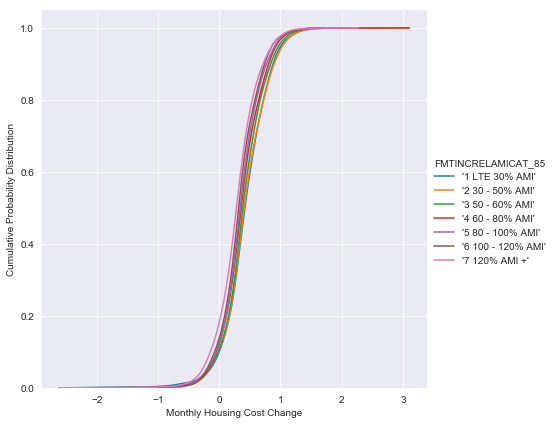

In [26]:
#inner joining '85 and '13 data
df85 = df_dict['1985']
df13 = df_dict['2013']
df_joined = df85.join(df13, lsuffix = '_85', rsuffix = '_13', how = 'inner')
#Removing any ZSMHC '85 values equal to zero
df_joined = df_joined.loc[df_joined['ZSMHC_85'] != 0]
#Removing any ZSMHC '13' values equal to zero
df_joined = df_joined.loc[df_joined['ZSMHC_13'] != 0]
#Calculating log fraction of ZSMHC 13 to ZSMHC 85
df_joined['ZSMHC_change'] = np.log10(df_joined['ZSMHC_13']/df_joined['ZSMHC_85'])

#plot cumulative prob distribution of burden change for each income group
g = sns.FacetGrid(df_joined, hue='FMTINCRELAMICAT_85', hue_order=income_group_order,\
                  height=6, aspect=1)
g.map(sns.kdeplot, 'ZSMHC_change', cumulative=True)
g.set_axis_labels('Monthly Housing Cost Change', 'Cumulative Probability Distribution')
g = g.add_legend()

The monthly housing cost on average increases from 1985 to 2013 across all income groups.

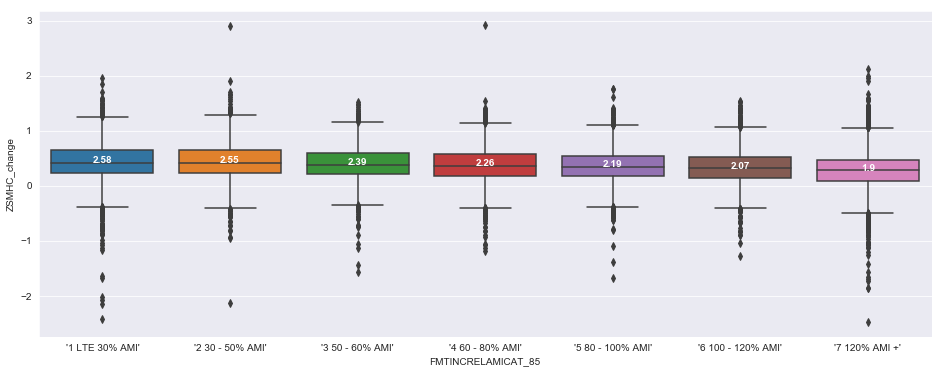

In [29]:
fig   = plt.figure(figsize=(16,6))
#ylims = plt.ylim(0, 400)
ax    = sns.boxplot(y = 'ZSMHC_change', x = 'FMTINCRELAMICAT_85', order = income_group_order, data = df_joined)

medians = df_joined.groupby(['FMTINCRELAMICAT_85'])['ZSMHC_change'].median().values

median_labels = [str(np.round(10**s, 2)) for s in medians]

xpos = np.arange(7)
ypos = medians


for x, y, label in zip(xpos, ypos, median_labels):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', ha='center', transform=ax.transData)

The box plot above has been annotated with the median monthly housing cost change. The lowest income group saw the biggest increase from 1985 to 2013. The highest income group saw the smallest increase in monthly housing cost.

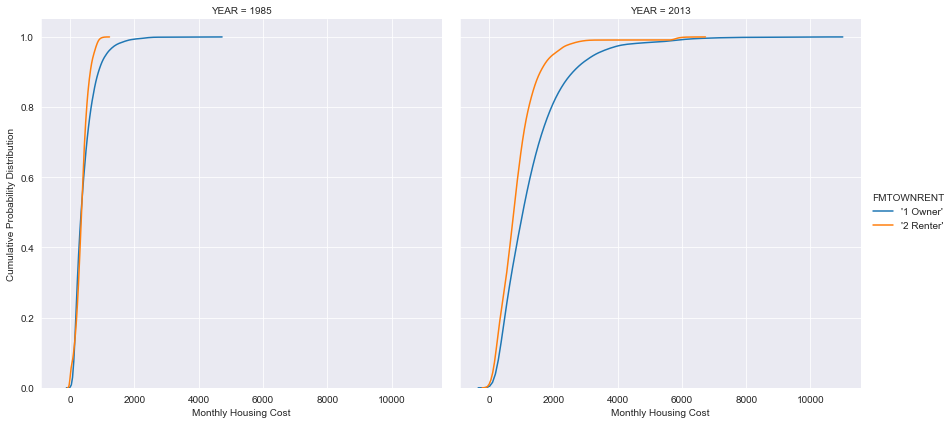

In [30]:
#Plot ZSMHC distribution for owners and renters for years '85 and '13'
owner_status_order = ['\'1 Owner\'', '\'2 Renter\'']
g = sns.FacetGrid(df, hue='FMTOWNRENT', hue_order = owner_status_order, col='YEAR', height=6, aspect=1)
g.map(sns.kdeplot, 'ZSMHC', cumulative=True)
g.set_axis_labels('Monthly Housing Cost', 'Cumulative Probability Distribution')
g = g.add_legend()

As per plot above, owners on average have lower monthly housing cost. The monthly housing cost has on average increased from 1985 to 2013 for both owners and renters.

In [31]:
print(df.loc[df['YEAR'] == '1985', 'FMTASSISTED'].value_counts())
print(df.loc[df['YEAR'] == '2013', 'FMTASSISTED'].value_counts())

'0 Not Assisted'    38703
'1 Assisted'         2177
Name: FMTASSISTED, dtype: int64
'.'                 35852
'0 Not Assisted'    17626
'1 Assisted'         6618
Name: FMTASSISTED, dtype: int64


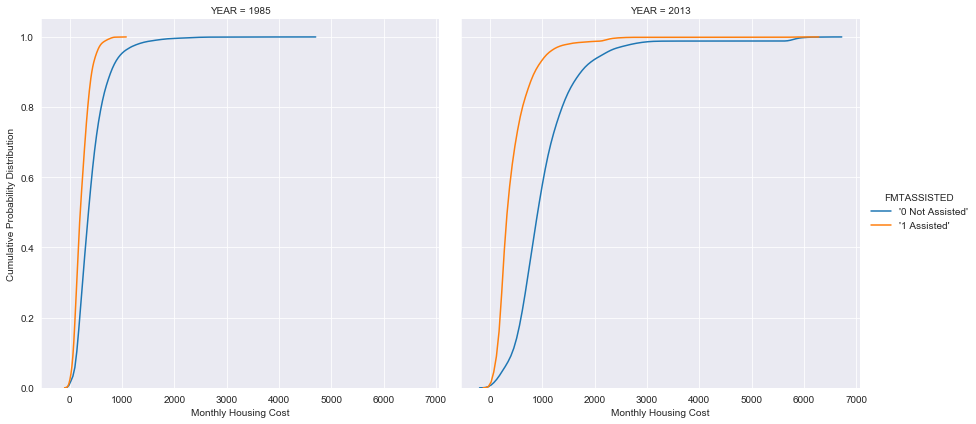

In [32]:
#plot burden distribution for assisted and not assisted groups, in years '85 and '13
#remove any observations of '.' in FMTASSISTED column
g = sns.FacetGrid(df.loc[~df['FMTASSISTED'].str.contains('.', regex=False),:], hue='FMTASSISTED', col='YEAR',\
                  height=6, aspect=1)
g.map(sns.kdeplot, 'ZSMHC', cumulative=True)
g.set_axis_labels('Monthly Housing Cost', 'Cumulative Probability Distribution')
g = g.add_legend()

Not assisted households on average have a higher monthly housing cost. The monthly housing cost increased on average for both assisted and not assisted households.